In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# МЕТОДЫ АНАЛИЗА ДАННЫХ. РГЗ.


In [ ]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

In [ ]:
# import sklearn.datasets
# wine = sklearn.datasets.load_boston()
# data = pd.DataFrame(wine.data, columns = wine.feature_names)
# target = pd.DataFrame({'target': wine.target})
# print(data.head())
# print(target.head())

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/data/seeds.csv')
target = pd.DataFrame({'target': data['length_of_kernel_groove']})
data = data.drop(['length_of_kernel_groove'], axis=1)
print(data.head())
print(target.head())

        area  perimeter  ...  width_of_kernel  asymmetry_coefficient
15.26  14.84     0.8710  ...            2.221                  5.220
14.88  14.57     0.8811  ...            1.018                  4.956
14.29  14.09     0.9050  ...            2.699                  4.825
13.84  13.94     0.8955  ...            2.259                  4.805
16.14  14.99     0.9034  ...            1.355                  5.175

[5 rows x 6 columns]
       target
15.26       1
14.88       1
14.29       1
13.84       1
16.14       1


In [ ]:
data.head()

area  perimeter  ...  width_of_kernel  asymmetry_coefficient
15.26  14.84     0.8710  ...            2.221                  5.220
14.88  14.57     0.8811  ...            1.018                  4.956
14.29  14.09     0.9050  ...            2.699                  4.825
13.84  13.94     0.8955  ...            2.259                  4.805
16.14  14.99     0.9034  ...            1.355                  5.175

[5 rows x 6 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 210 entries, 15.26 to 12.3
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   area                   210 non-null    float64
 1   perimeter              210 non-null    float64
 2   compactness            210 non-null    float64
 3   length_of_kernel       210 non-null    float64
 4   width_of_kernel        210 non-null    float64
 5   asymmetry_coefficient  210 non-null    float64
dtypes: float64(6)
memory usage: 11.5 KB


In [ ]:
data.shape

(210, 6)

# Tools

## Графики

In [ ]:
from mpl_toolkits.mplot3d import Axes3D 
from itertools import combinations
from matplotlib.pylab import *
from matplotlib.colors import ListedColormap


colors = ['pink', 'plum', 'indianred', 'palevioletred']
nejnii_colormapchik = ListedColormap(colors)

def scatter3d(data, actual, pred, cols=4):
    colors = np.random.permutation(['burlywood', 'sienna', 'darksalmon','tomato'])

    N = 3 
    combinations_list = list(combinations(data.columns, N))
    combinations_iter = iter(combinations_list)   

    rows = ceil((len(combinations_list) - 1)/ cols)
    height = 5
    width = 6

    fig1 = plt.figure(figsize=(width * cols, height * rows))
    fig1.suptitle('Clustering', fontsize=16)

    fig2 = plt.figure(figsize=(width * cols, height * rows))
    fig2.suptitle('Actual classes', fontsize=16)

    for i, combination in enumerate(combinations_list):
        ax = fig1.add_subplot(rows, cols, i+1, projection='3d')
        ax.scatter(data[combination[0]], data[combination[1]], 
                    data[combination[2]], c=pred, cmap=nejnii_colormapchik)
        ax.set_xlabel(combination[0])
        ax.set_ylabel(combination[1])
        ax.set_zlabel(combination[2])

    for i, combination in enumerate(combinations_list):
        ax = fig2.add_subplot(rows, cols, i+1, projection='3d')
        ax.scatter(data[combination[0]], data[combination[1]], 
                    data[combination[2]], c=actual, cmap=nejnii_colormapchik)
        ax.set_xlabel(combination[0])
        ax.set_ylabel(combination[1])
        ax.set_zlabel(combination[2])

In [ ]:
from mpl_toolkits.mplot3d import Axes3D 
from itertools import combinations
from matplotlib.pylab import *

def scatter3d_special(data, axes_list, labels=None, title=''):
    cols = len(axes_list)
    rows = 1
    height = 5
    width = 6

    fig = plt.figure(figsize=(width * cols, height))
    fig.suptitle(title, fontsize=20)
    for i, axes in enumerate(axes_list):
        ax = fig.add_subplot(rows, cols, i+1, projection='3d')
        ax.scatter(data[axes[0]], data[axes[1]], data[axes[2]], 
                   c=labels, cmap=nejnii_colormapchik)
        ax.set_xlabel(axes[0])
        ax.set_ylabel(axes[1])
        ax.set_zlabel(axes[2])


In [ ]:
def scatter3d_special_compare(data, actual, preds, features):
    scatter3d_special(data_std, features, preds, 'Clustering')
    scatter3d_special(data_std, features, actual, 'Actual classes')

In [ ]:
def scatter2d_special(data, axes_list, labels=None, title=''):
    rows = 1
    cols = len(axes_list)
    rows = 1
    height = 4
    width = 5
    fig, axs = plt.subplots(rows, cols, figsize=(width * cols, height * rows))
    fig.suptitle(title, fontsize=20)

    for i, axes in enumerate(axes_list):
        axs[i].scatter(data[axes[0]], data[axes[1]], c=labels, cmap=nejnii_colormapchik)
        axs[i].set(xlabel=axes[0], ylabel=axes[1])

In [ ]:
def scatter2d_special_compare(data, actual, preds, features):
    scatter2d_special(data_std, features, preds, 'Clustering')
    scatter2d_special(data_std, features, actual, 'Actual classes')

## Метрики

In [ ]:
def find_centroids(data: np.array, labels):
    cluster_indices = {}
    for cluster_label in np.unique(labels):
        cluster_indices[cluster_label] = np.where(labels == cluster_label)
    cluster_centroids = []
    for cluster in sorted(cluster_indices.keys()):
        centroid = data[cluster_indices[cluster]].mean(axis=0)
        cluster_centroids.append(centroid)
    return cluster_centroids

In [ ]:
from scipy.spatial import distance


def bss(data: np.array, labels):
    centroids = find_centroids(data, labels)
    k = len(centroids)
        
    cluster_pair = list(combinations(range(k), 2))
    sum = []
    for pair in cluster_pair:
        sum.append(distance.euclidean(centroids[pair[0]], centroids[pair[1]]))
    return np.array(sum).mean()

In [ ]:
def intra_cluster_distance(data: np.array, labels):
    centroids = find_centroids(data, labels)
    clusters_mean = 0
    unique_labels = np.unique(labels)
    unique_labels = unique_labels[unique_labels >= 0]
    for i, centroid in zip(unique_labels, centroids):
        indices = np.where(labels == i)
        mean_euclidean_dist = np.array(
            ((data[indices] - centroids[i]) ** 2).sum(axis=1) ** (1 / 2)
        ).mean()
        clusters_mean += mean_euclidean_dist
    return clusters_mean / len(centroids)


In [ ]:
def cluster_cohesion(data: np.array, labels):
    centroids = find_centroids(data, labels)
    clusters_sum = 0
    unique_labels = np.unique(labels)
    unique_labels = unique_labels[unique_labels >= 0]
    for i, centroid in zip(unique_labels, centroids):
        indices = np.where(labels == i)
        sum_of_sqares_for_cluster = np.array(
            ((data[indices] - centroids[i]) ** 2).sum(axis=1)
        ).sum()
        clusters_sum += sum_of_sqares_for_cluster 
    return clusters_sum

In [ ]:
!pip install validclust

In [ ]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from validclust import dunn

def determine_number_of_clusters(data, k_max, metric='davies_bouldin'):
    score = []
    k_values = list(range(2, k_max+1))
    for k in k_values:
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel.fit(data_std)
        if metric == 'davies_bouldin':
            score.append(davies_bouldin_score(data_std,  kmeanModel.labels_))
        elif metric == 'calinski_harabasz':
            score.append(calinski_harabasz_score(data_std,  kmeanModel.labels_))
        elif metric == 'dunn':
            dist = pairwise_distances(data)
            score.append(dunn(dist, kmeanModel.labels_))
        else:
            raise Exception('беды с метрикой')
    
    metrics = {
        'davies_bouldin': 'Индекс Дэвиса-Болдина',
        'calinski_harabasz':'Индекс Калински-Харабаша',
        'dunn':'Индекс Данна'
    }
    
    plt.xticks(k_values, k_values)
    plt.plot(k_values, score, 'bx-', color='red')
    plt.xlabel('Количество кластеров')
    plt.ylabel(metrics[metric])

# Нормализация данных

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
data_val = sc.fit_transform(data.values)
data_val_t = np.array([data_val[:, i] for i in range(data.shape[1])])
data_std = pd.DataFrame({col: val for col, val in zip(data.columns, data_val_t)})

In [ ]:
data_std.head()

area  perimeter  ...  width_of_kernel  asymmetry_coefficient
0  0.502066   0.570780  ...         0.189302               0.345150
1  0.446281   0.662432  ...         0.032883               0.215165
2  0.347107   0.879310  ...         0.251453               0.150665
3  0.316116   0.793103  ...         0.194243               0.140817
4  0.533058   0.864791  ...         0.076701               0.322994

[5 rows x 6 columns]

# Дескриптивный анализ

## Гистограммы

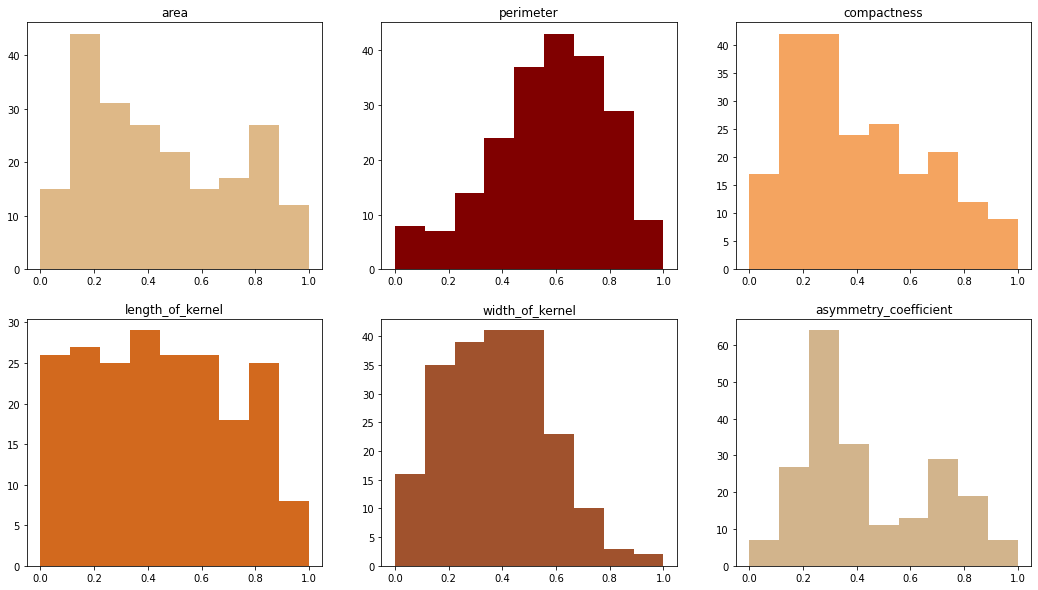

In [ ]:
from math import ceil
from math import log10

n_bins = ceil(1 + 3.322*log10(data.shape[0]))
col_iter = iter(data_std.columns)
colors = iter(np.random.permutation(['burlywood', 'tan', 'peru', 'sandybrown',
                                     'chocolate', 'sienna', 'coral', 'darksalmon',
                                     'tomato', 'salmon', 'lightcoral', 'indianred',
                                     'firebrick', 'brown', 'darkred', 'maroon']))

cols = 3
rows = ceil((len(data_std.columns) - 1)/ cols)
height = 5
width = 6
fig, axs = plt.subplots(rows, cols, figsize=(width * cols, height * rows))

for i in range(0, rows):
  for j in range(0, cols):
    try:
      feature_name = next(col_iter)
      axs[i, j].hist(data_std[feature_name], bins=n_bins, color=next(colors))
      axs[i, j].set_title(feature_name)
    except StopIteration:
      break

## Диаграммы рассеивания 2d

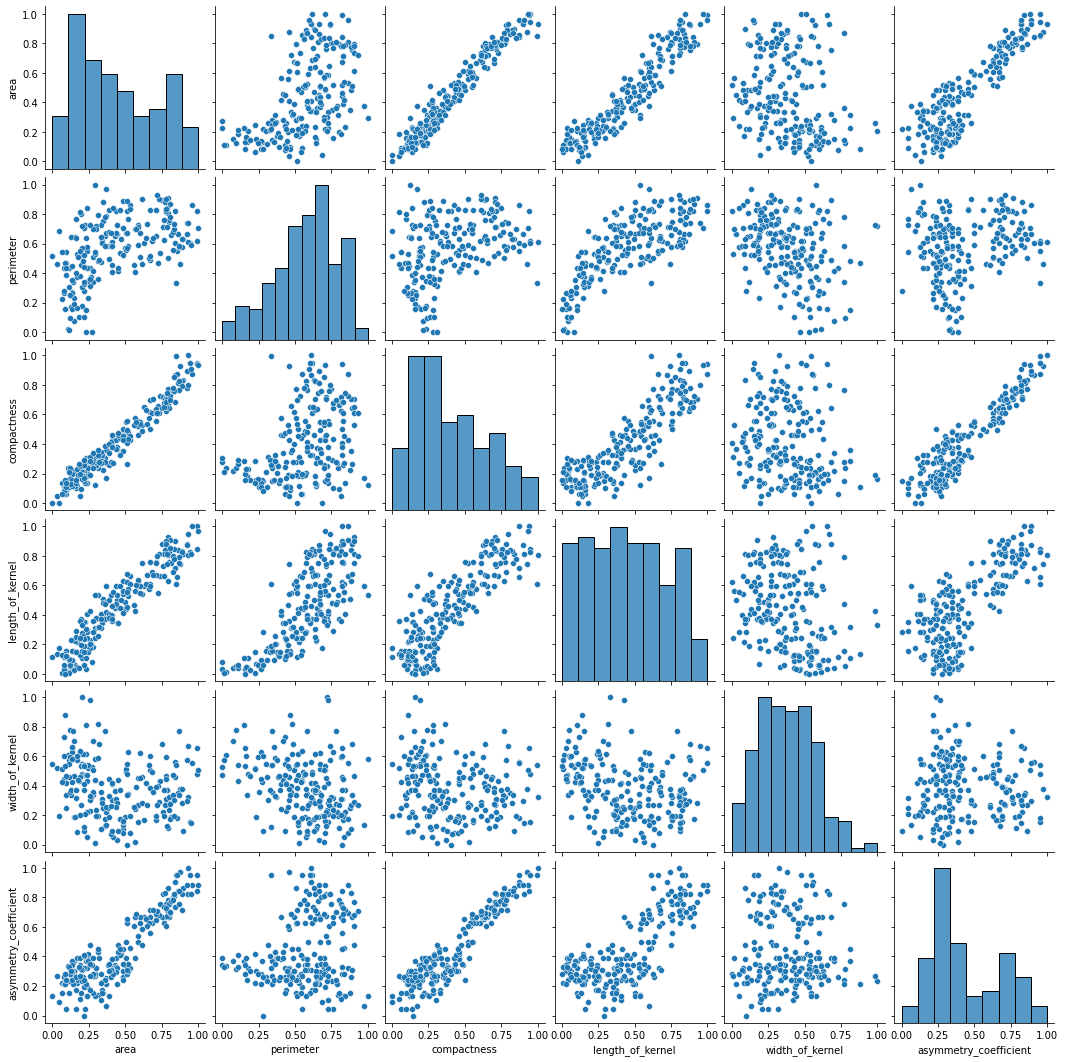

In [ ]:
sns.pairplot(data_std)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=3)
X= pca.fit_transform(data_std)

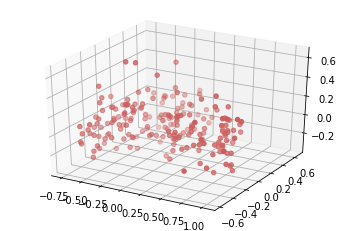

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0], X[:,1], X[:,2], color='indianred')
plt.show()

## Диаграмма рассеяния 3d

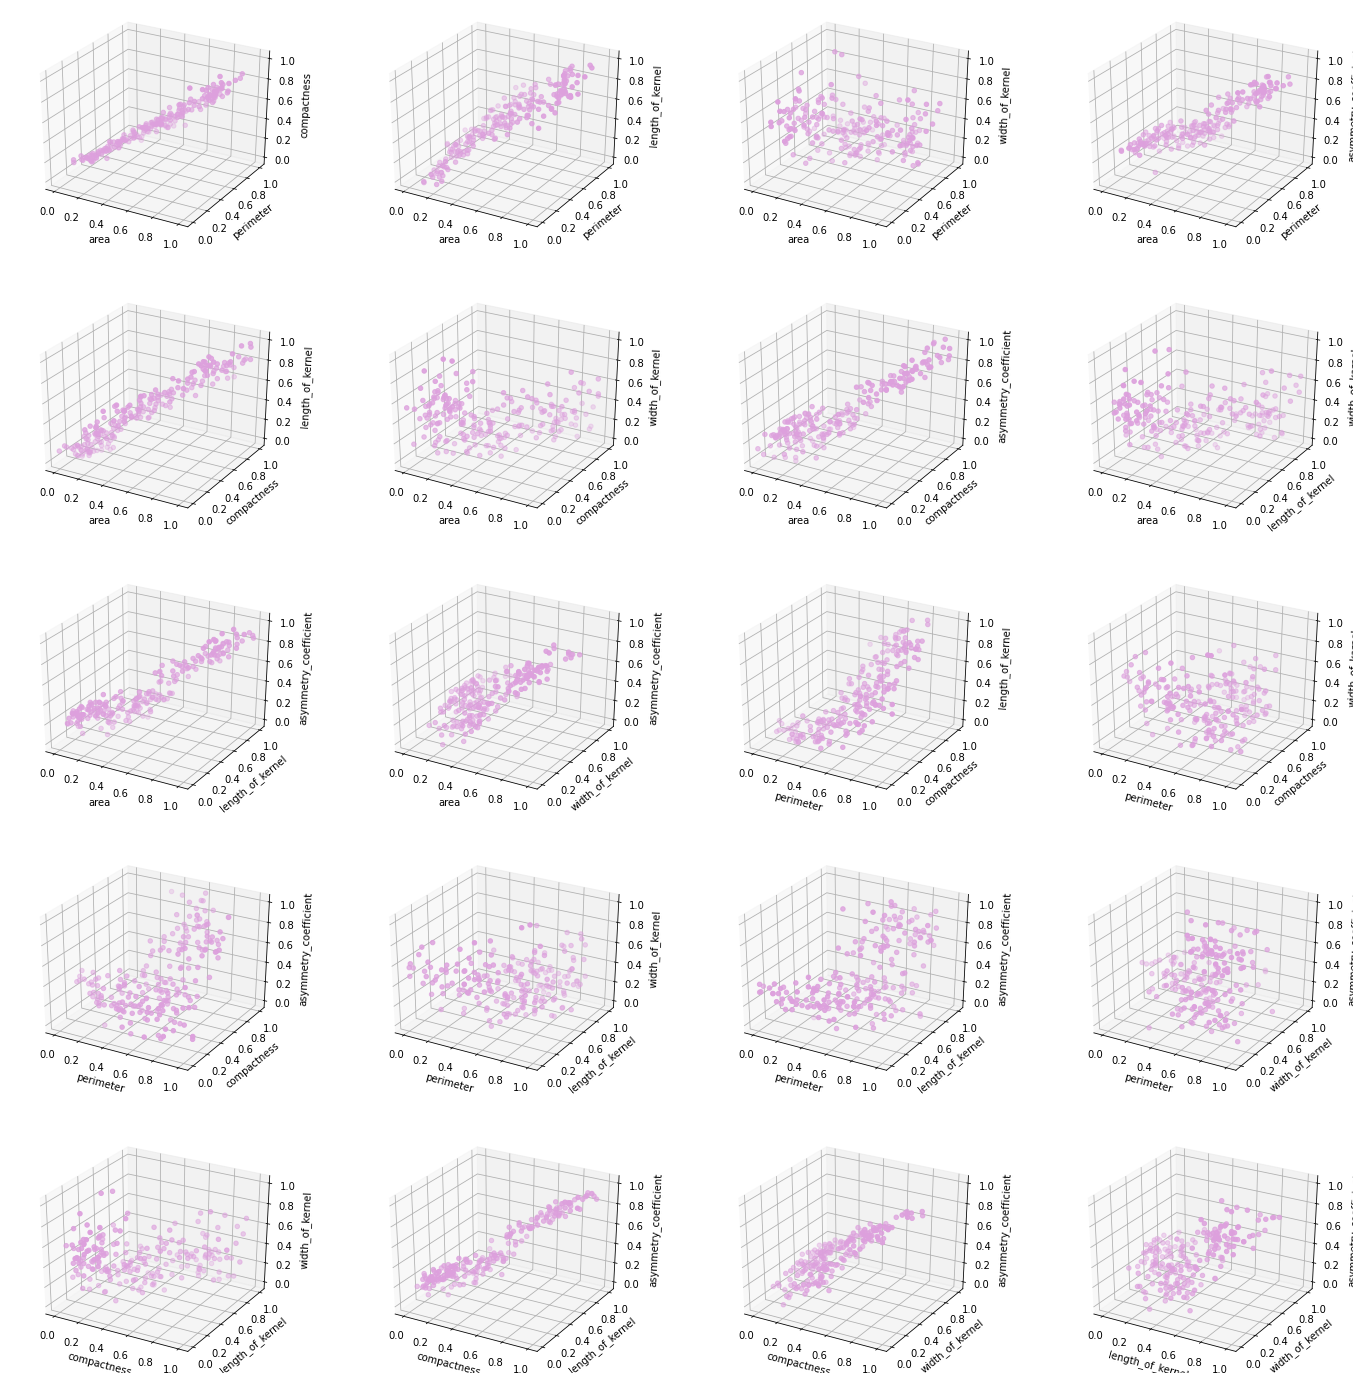

In [ ]:
from mpl_toolkits.mplot3d import Axes3D 
from itertools import combinations

N = 3 
combinations_list = list(combinations(data_std.columns, N))
combinations_iter = iter(combinations_list)

cols = 4
rows = ceil((len(combinations_list) - 1)/ cols)
height = 5
width = 6

fig = plt.figure(figsize=(width * cols, height * rows))

for i, combination in enumerate(combinations_list):
    ax = fig.add_subplot(rows, cols, i+1, projection='3d')
    ax.scatter3D(data_std[combination[0]], data_std[combination[1]], 
                 data_std[combination[2]], color='plum')
    ax.set_xlabel(combination[0])
    ax.set_ylabel(combination[1])
    ax.set_zlabel(combination[2])

## Численные характеристики

In [ ]:
import scipy.stats as sts
stats = pd.DataFrame(columns=['Признак', 'Мат. ожидание', 'Медиана', 'Мода',
                              'Дисперсия', 'σ', 
                              'Эксцесс', 'Асимметрия', 'min', 'max'])
for col in data.columns:
    nobs, minmax, mean, variance, skewness, kurtosis = sts.describe(data[col])
    mode = sts.mode(data[col])

    stats = stats.append({
        'Признак': col, 
        'Мат. ожидание': mean,
        'Медиана': np.median(data[col]), 
        'Мода': mode[0][0],
        'Дисперсия': variance,
        'σ': data[col].std(),
        'Эксцесс': kurtosis,
        'Асимметрия': skewness, 
        'min': minmax[0], 
        'max': minmax[1]
        },
        ignore_index=True
        )
stats

Признак  Мат. ожидание   Медиана  ...  Асимметрия      min      max
0                   area      14.559286  14.32000  ...    0.383806  12.4100  17.2500
1              perimeter       0.870999   0.87345  ...   -0.534104   0.8081   0.9183
2            compactness       5.628533   5.52350  ...    0.521721   4.8990   6.6750
3       length_of_kernel       3.258605   3.23700  ...    0.133416   2.6300   4.0330
4        width_of_kernel       3.700201   3.59900  ...    0.398793   0.7651   8.4560
5  asymmetry_coefficient       5.408071   5.22300  ...    0.557876   4.5190   6.5500

[6 rows x 10 columns]

## Корреляция

In [ ]:
data.corr()

area  ...  asymmetry_coefficient
area                   1.000000  ...               0.890784
perimeter              0.529244  ...               0.226825
compactness            0.972422  ...               0.932806
length_of_kernel       0.944829  ...               0.749131
width_of_kernel       -0.217340  ...              -0.011079
asymmetry_coefficient  0.890784  ...               1.000000

[6 rows x 6 columns]

In [ ]:
data.corr(method='spearman')

area  ...  asymmetry_coefficient
area                   1.000000  ...               0.802858
perimeter              0.553255  ...               0.161379
compactness            0.962747  ...               0.875416
length_of_kernel       0.945692  ...               0.669739
width_of_kernel       -0.260672  ...               0.020503
asymmetry_coefficient  0.802858  ...               1.000000

[6 rows x 6 columns]

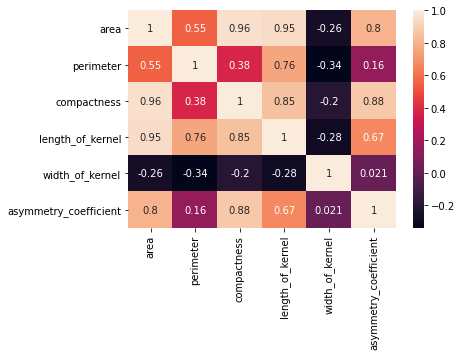

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corrMatrix = data.corr(method='spearman')
sns.heatmap(corrMatrix, annot=True)
plt.show()

# Hierarchical Clustering

## Дендограмма

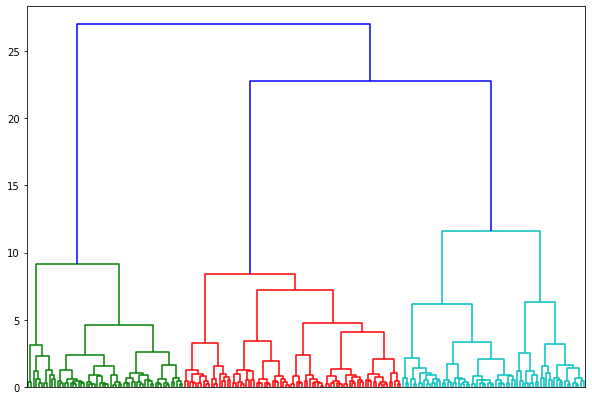

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(data, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True,
           no_labels=True)
plt.show()

## 2 кластера

In [ ]:
data.columns

Index(['area', 'perimeter', 'compactness', 'length_of_kernel',
       'width_of_kernel', 'asymmetry_coefficient'],
      dtype='object')

In [ ]:
features_for_3d_scatter = [
                           ['perimeter', 'compactness', 'asymmetry_coefficient'],
                           ['compactness', 'length_of_kernel', 'width_of_kernel'],
                           ['area', 'length_of_kernel', 'asymmetry_coefficient'],
]

features_for_2d_scatter = [
                           ['area', 'width_of_kernel'],
                           ['asymmetry_coefficient', 'width_of_kernel'],
                           ['perimeter', 'compactness'],
]

In [ ]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = clustering.fit_predict(data_std.values)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
target.values.flatten()

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

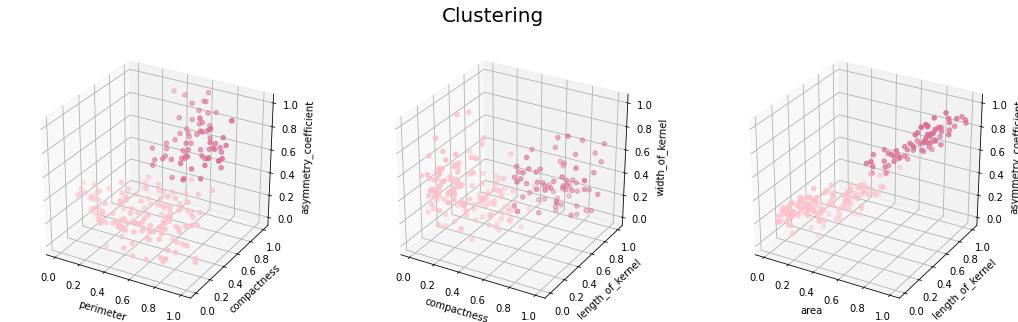

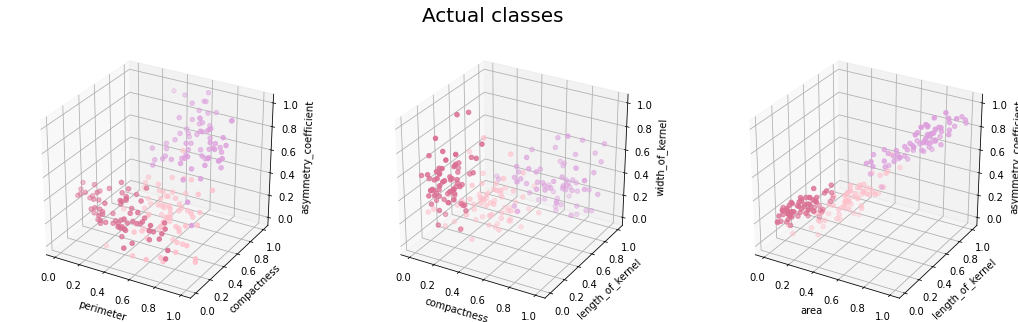

In [ ]:
scatter3d_special_compare(data_std, target.values.flatten(), labels, features_for_3d_scatter)

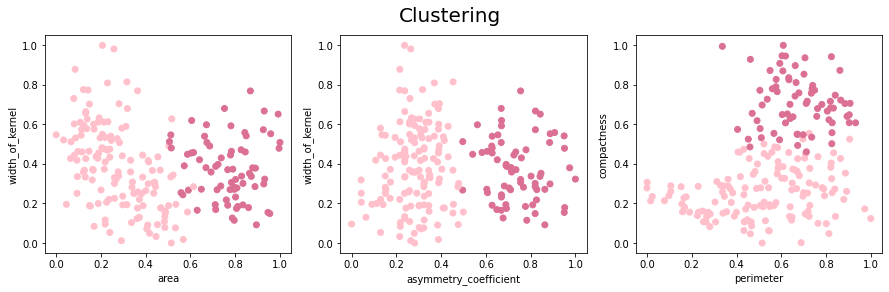

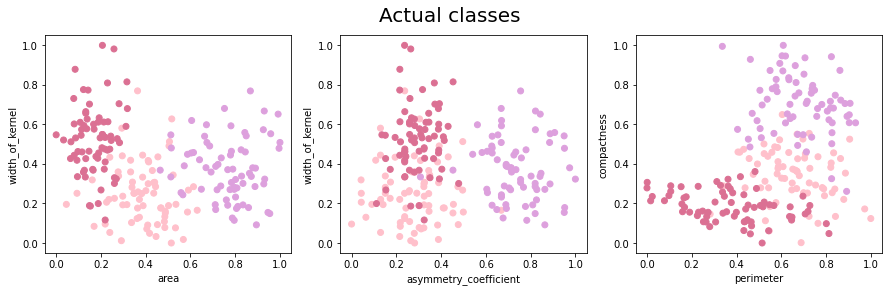

In [ ]:
scatter2d_special_compare(data_std, target.values.flatten(), labels, features_for_2d_scatter)

#### Метрики

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics import calinski_harabasz_score

In [ ]:
ss = silhouette_score(data_std, clustering.labels_)
print('silhouette score: ', ss)

chs = calinski_harabasz_score(data_std, clustering.labels_)
print('calinski_harabasz_score: ', chs)

cluster_separation = bss(data_std.values, clustering.labels_)
print('cluster_separation(bss): ', cluster_separation)

icd = intra_cluster_distance(data_std.values, clustering.labels_)
print('intra_cluster_distance: ', icd)

cc = cluster_cohesion(data_std.values, clustering.labels_)
print('cluster_cohesion(wss): ', cc)

silhouette score:  0.48105049648084514
calinski_harabasz_score:  269.93627047095623
cluster_separation(bss):  0.9379893138591907
intra_cluster_distance:  0.35076119846836623
cluster_cohesion(wss):  31.86043692463249


## 3 кластера 

In [ ]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels = clustering.fit_predict(data_std.values)
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
target.values.flatten()

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

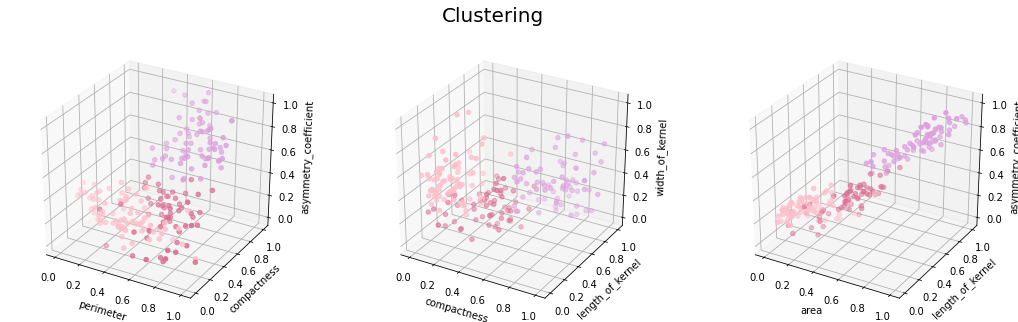

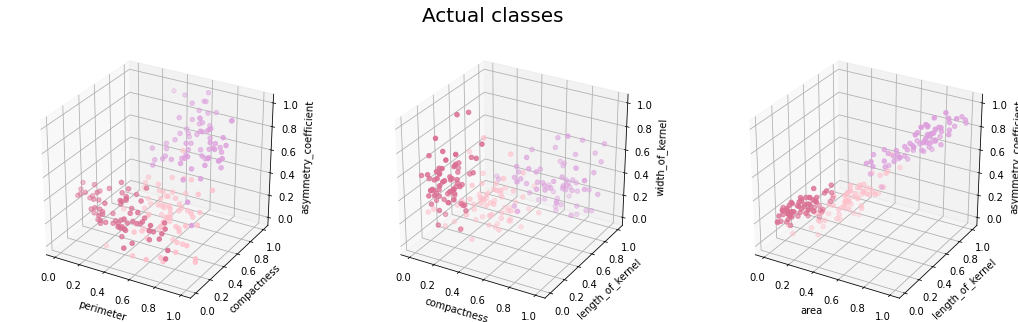

In [ ]:
scatter3d_special_compare(data_std, target.values.flatten(), labels, features_for_3d_scatter)

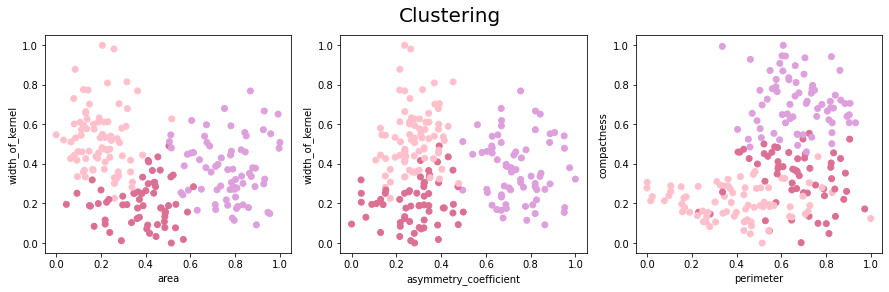

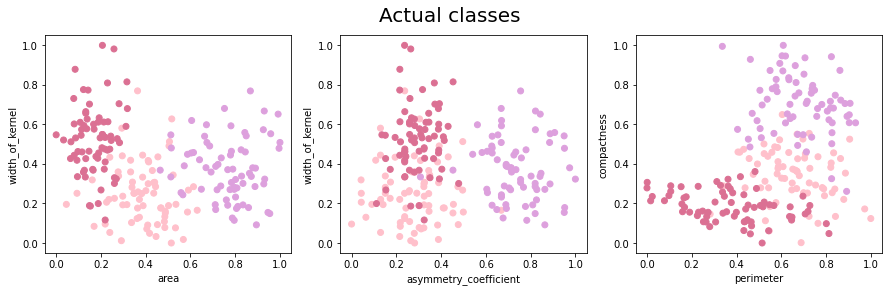

In [ ]:
scatter2d_special_compare(data_std, target.values.flatten(), labels, features_for_2d_scatter)

In [ ]:
labels = list(clustering.labels_)
clust_to_letter = {0: 'a', 1: 'b', 2: 'c'}
letter_to_class = {'a': 3, 'b': 2, 'c': 1}
new_labels = []
for i, label in enumerate(labels):
    new_labels.append(clust_to_letter[labels[i]])
for i, label in enumerate(new_labels):
    new_labels[i] = letter_to_class[new_labels[i]]
new_labels = np.array(new_labels)
new_labels = new_labels.flatten()

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(target.values.flatten(), new_labels)

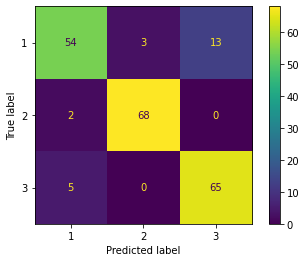

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[1,2,3])
disp = disp.plot()

plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(target.values.flatten(), new_labels))

              precision    recall  f1-score   support

           1       0.89      0.77      0.82        70
           2       0.96      0.97      0.96        70
           3       0.83      0.93      0.88        70

    accuracy                           0.89       210
   macro avg       0.89      0.89      0.89       210
weighted avg       0.89      0.89      0.89       210



### Метрики

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
ss = silhouette_score(data_std, clustering.labels_)
print('silhouette score: ', ss)

hom = homogeneity_score(target.values.flatten(), new_labels)
print('homogeneity: ', hom)

chs = calinski_harabasz_score(data_std, clustering.labels_)
print('calinski_harabasz_score: ', chs)

cluster_separation = bss(data_std.values, clustering.labels_)
print('cluster_separation(bss): ', cluster_separation)

icd = intra_cluster_distance(data_std.values, clustering.labels_)
print('intra_cluster_distance: ', icd)

cc = cluster_cohesion(data_std.values, clustering.labels_)
print('cluster_cohesion(wss): ', cc)

silhouette score:  0.3734720333872838
homogeneity:  0.6814320133966076
calinski_harabasz_score:  235.60906417725514
cluster_separation(bss):  0.8053258929653803
intra_cluster_distance:  0.30115041421003025
cluster_cohesion(wss):  22.34391826568683


# KMeans

## Метод колена

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_std)
    distortions.append(kmeanModel.inertia_)

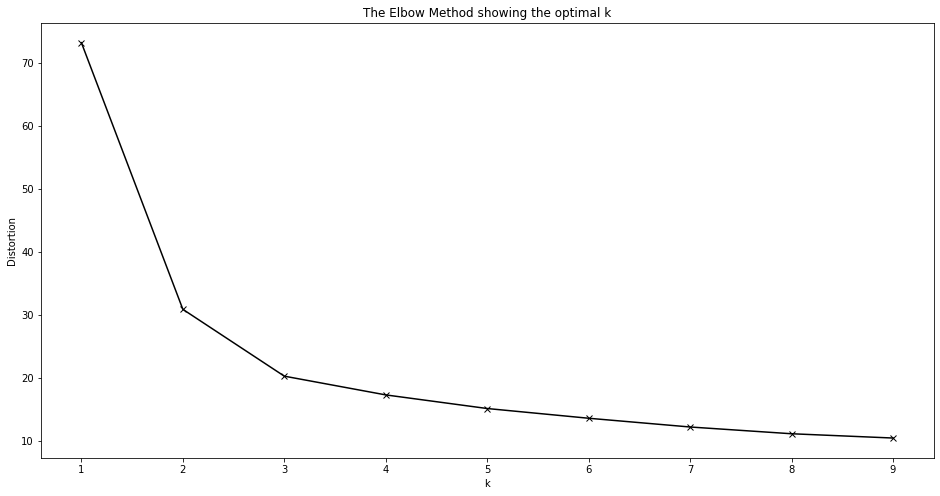

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-', color='black')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## График силуэта

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.4861987574864735
For n_clusters = 3 The average silhouette_score is : 0.4066761276634693
For n_clusters = 4 The average silhouette_score is : 0.32967826943092926
For n_clusters = 5 The average silhouette_score is : 0.2861151895331495


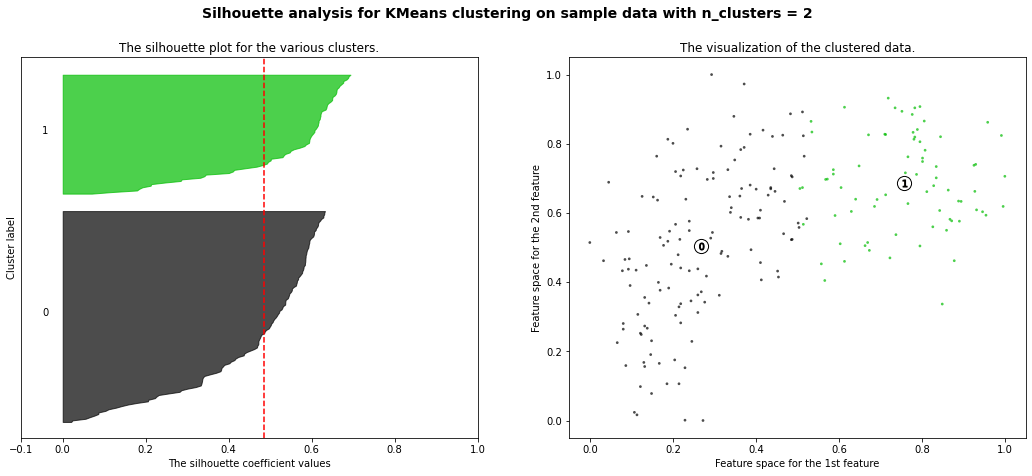

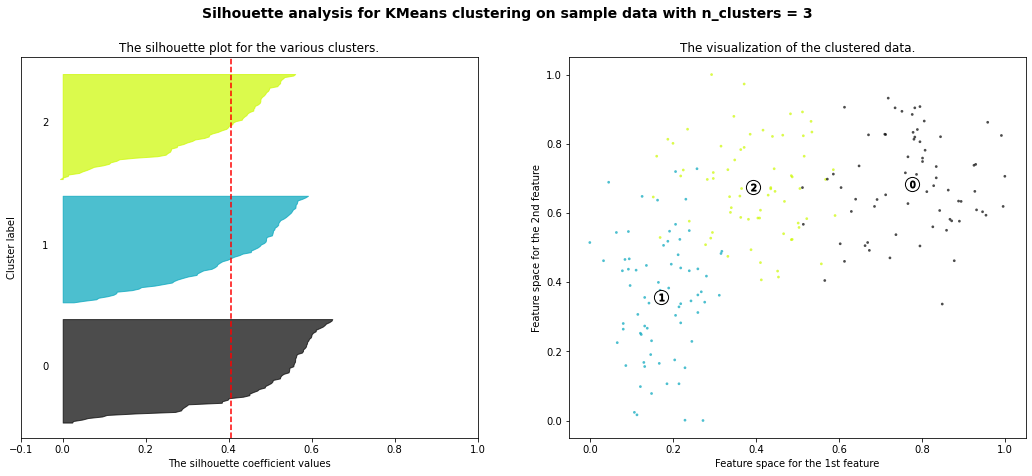

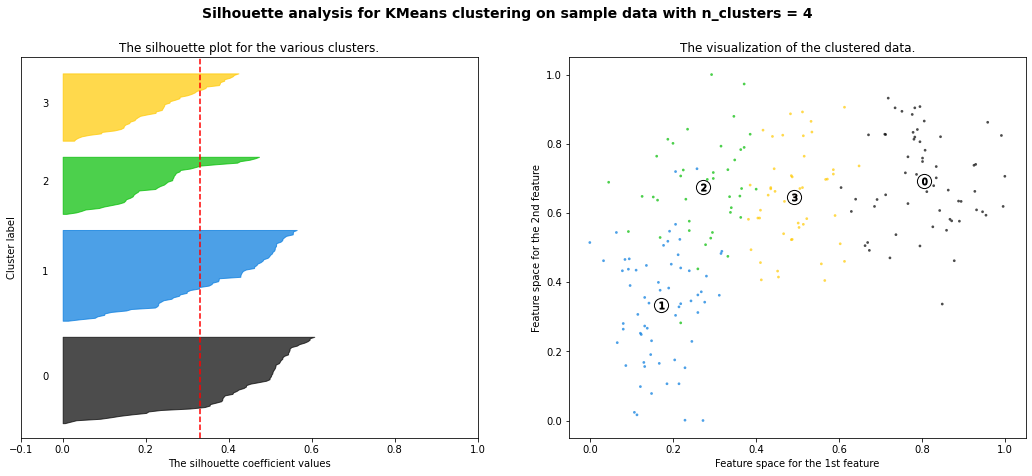

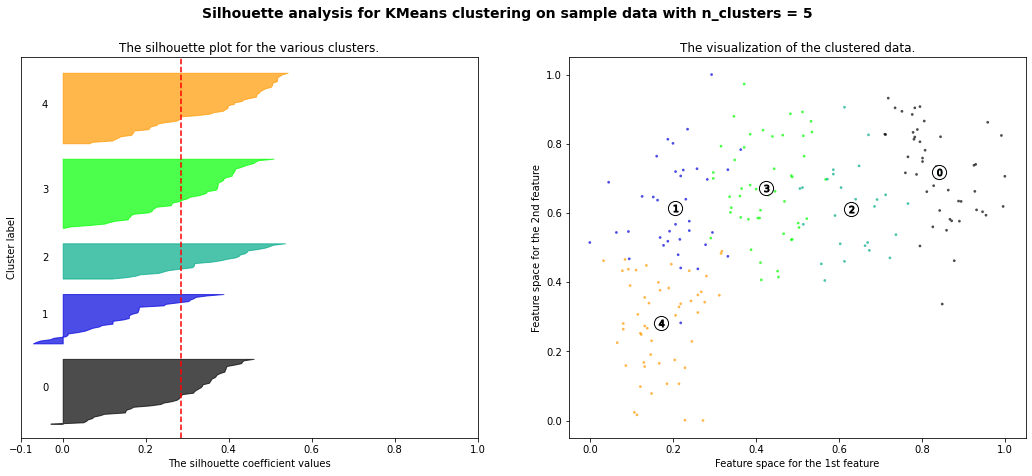

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility
X = data_std.values
y = target.target.values.flatten()

range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## Обучение

### Три кластера

#### init='random'



In [ ]:
from sklearn.cluster import KMeans
clustering = KMeans(n_clusters=3, init='random').fit(data_std)

In [ ]:
target.values.flatten()

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [ ]:
labels = clustering.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

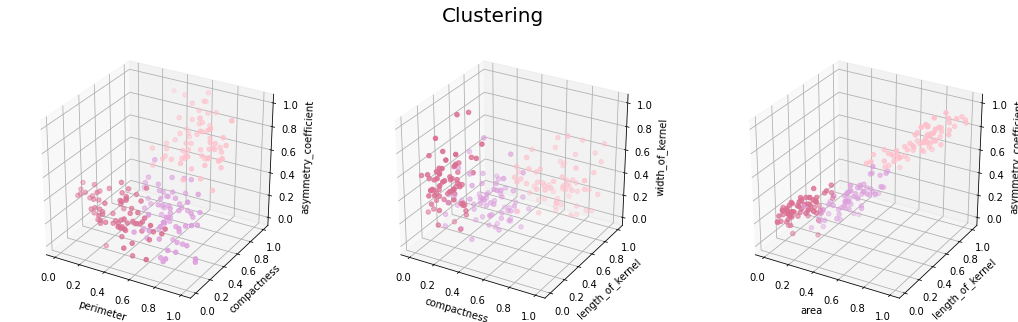

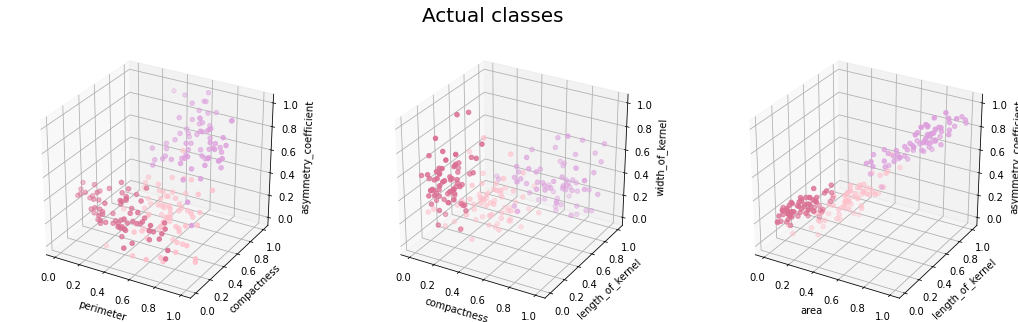

In [ ]:
scatter3d_special_compare(data_std, target.values.flatten(), labels, features_for_3d_scatter)

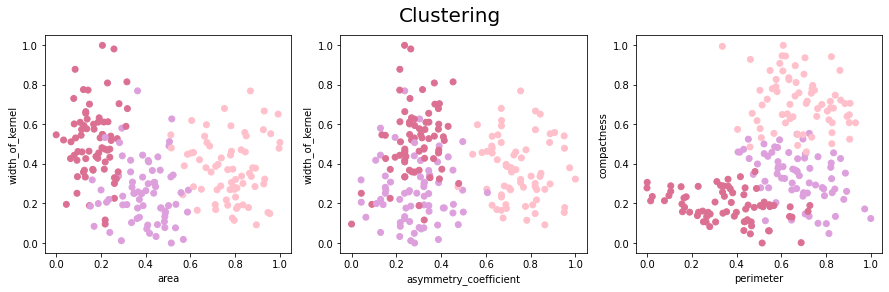

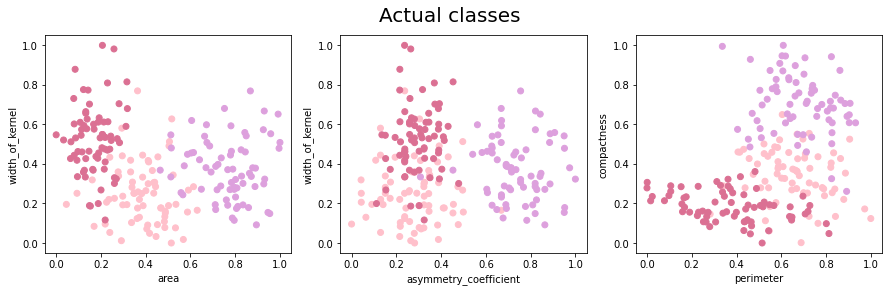

In [ ]:
scatter2d_special_compare(data_std, target.values.flatten(), labels, features_for_2d_scatter)

In [ ]:
from scipy.stats import mode

labels = list(clustering.labels_)
clust_to_letter = {0: 'a', 1: 'b', 2: 'c'}
letter_to_class = {'a': 3, 'b': 2, 'c': 1}
new_labels = []
for i, label in enumerate(labels):
    new_labels.append(clust_to_letter[labels[i]])
for i, label in enumerate(new_labels):
    new_labels[i] = letter_to_class[new_labels[i]]
new_labels = np.array(new_labels)
new_labels = new_labels.flatten()

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(target.values.flatten(), new_labels)

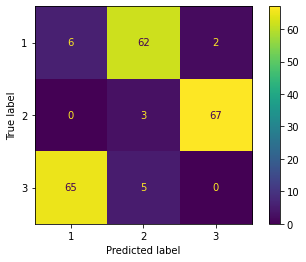

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[1,2,3])
disp = disp.plot()

plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(target.values.flatten(), new_labels))

              precision    recall  f1-score   support

           1       0.08      0.09      0.09        70
           2       0.04      0.04      0.04        70
           3       0.00      0.00      0.00        70

    accuracy                           0.04       210
   macro avg       0.04      0.04      0.04       210
weighted avg       0.04      0.04      0.04       210



##### Метрики

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics import calinski_harabasz_score

In [ ]:
ss = silhouette_score(data_std, clustering.labels_)
print('silhouette score: ', ss)

chs = calinski_harabasz_score(data_std, clustering.labels_)
print('calinski_harabasz_score: ', chs)

cluster_separation = bss(data_std.values, clustering.labels_)
print('cluster_separation(bss): ', cluster_separation)

icd = intra_cluster_distance(data_std.values, clustering.labels_)
print('intra_cluster_distance: ', icd)

cc = cluster_cohesion(data_std.values, clustering.labels_)
print('cluster_cohesion(wss): ', cc)

silhouette score:  0.4066761276634693
calinski_harabasz_score:  269.9399505598411
cluster_separation(bss):  0.8355996907365126
intra_cluster_distance:  0.2894043013407091
cluster_cohesion(wss):  20.289808848172434


#### init='k-means++'



In [ ]:
from sklearn.cluster import KMeans
clustering = KMeans(n_clusters=3, init='k-means++').fit(data_std)

In [ ]:
target.values.flatten()

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [ ]:
labels = clustering.labels_
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

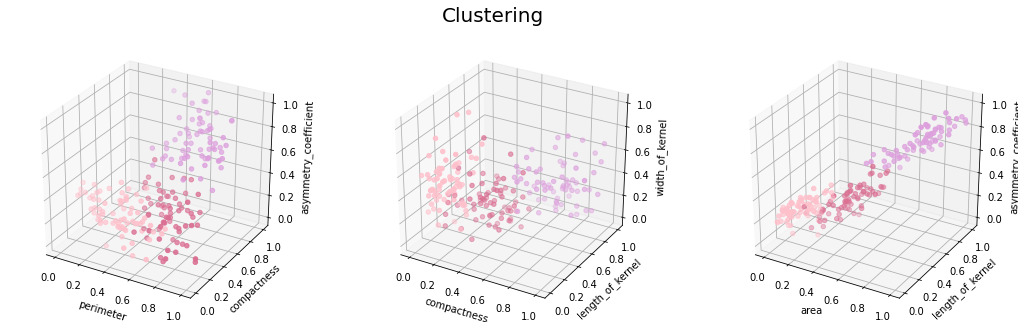

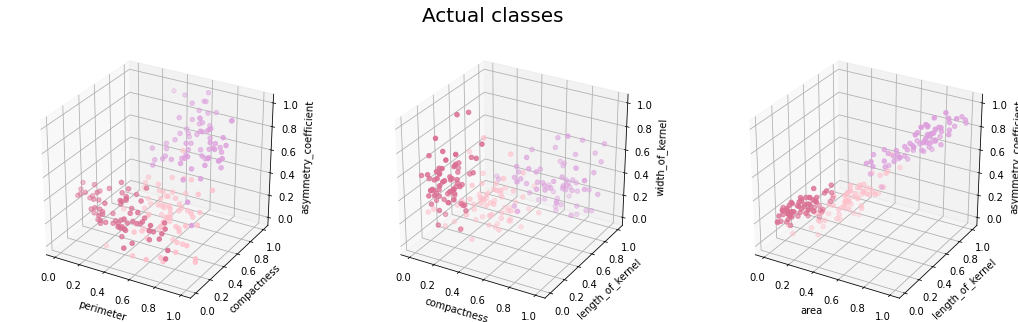

In [ ]:
scatter3d_special_compare(data_std, target.values.flatten(), labels, features_for_3d_scatter)

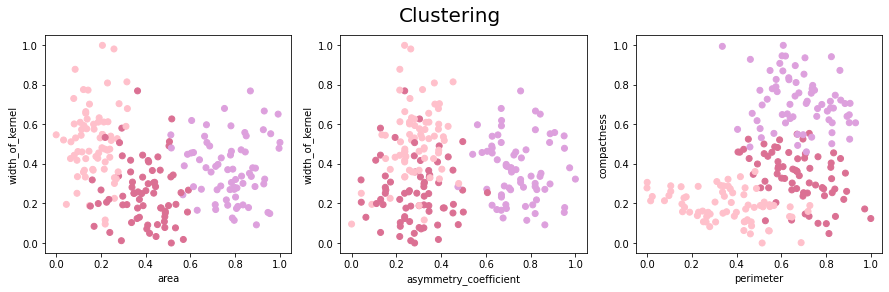

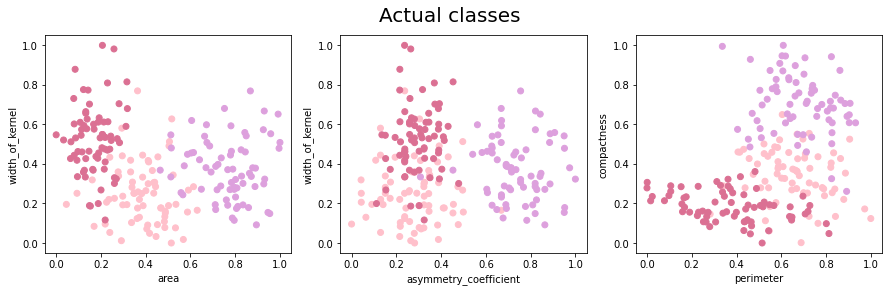

In [ ]:
scatter2d_special_compare(data_std, target.values.flatten(), labels, features_for_2d_scatter)

In [ ]:
labels = list(clustering.labels_)
clust_to_letter = {0: 'a', 1: 'b', 2: 'c'}
letter_to_class = {'a': 3, 'b': 2, 'c': 1}
new_labels = []
for i, label in enumerate(labels):
    new_labels.append(clust_to_letter[labels[i]])
for i, label in enumerate(new_labels):
    new_labels[i] = letter_to_class[new_labels[i]]
new_labels = np.array(new_labels)
new_labels = new_labels.flatten()

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(target.values.flatten(), new_labels)

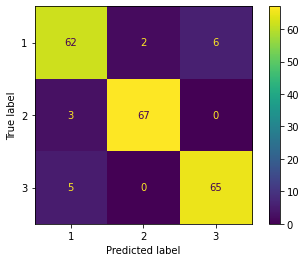

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[1,2,3])
disp = disp.plot()

plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(target.values.flatten(), new_labels))

              precision    recall  f1-score   support

           1       0.89      0.89      0.89        70
           2       0.97      0.96      0.96        70
           3       0.92      0.93      0.92        70

    accuracy                           0.92       210
   macro avg       0.92      0.92      0.92       210
weighted avg       0.92      0.92      0.92       210



##### Метрики

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics import calinski_harabasz_score

In [ ]:
ss = silhouette_score(data_std, clustering.labels_)
print('silhouette score: ', ss)

chs = calinski_harabasz_score(data_std, clustering.labels_)
print('calinski_harabasz_score: ', chs)

cluster_separation = bss(data_std.values, clustering.labels_)
print('cluster_separation(bss): ', cluster_separation)

icd = intra_cluster_distance(data_std.values, clustering.labels_)
print('intra_cluster_distance: ', icd)

cc = cluster_cohesion(data_std.values, clustering.labels_)
print('cluster_cohesion(wss): ', cc)

silhouette score:  0.4066761276634693
calinski_harabasz_score:  269.9399505598411
cluster_separation(bss):  0.8355996907365126
intra_cluster_distance:  0.28940430134070905
cluster_cohesion(wss):  20.289808848172434


### Два кластера

In [ ]:
from sklearn.cluster import KMeans
clustering = KMeans(n_clusters=2).fit(data_std)

In [ ]:
target.values.flatten()

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [ ]:
labels = clustering.labels_
labels

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

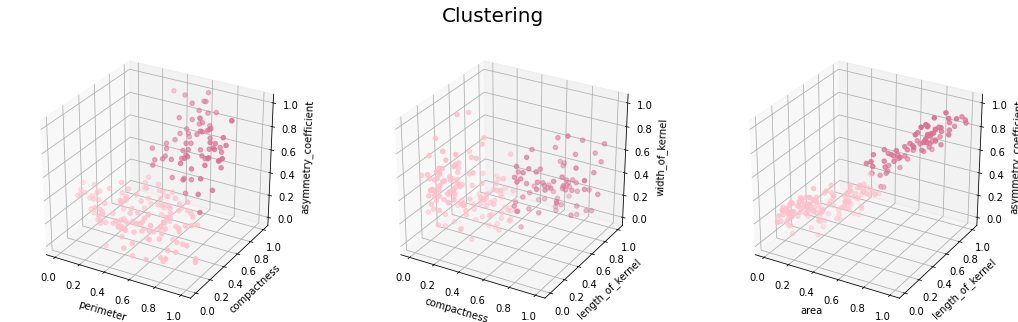

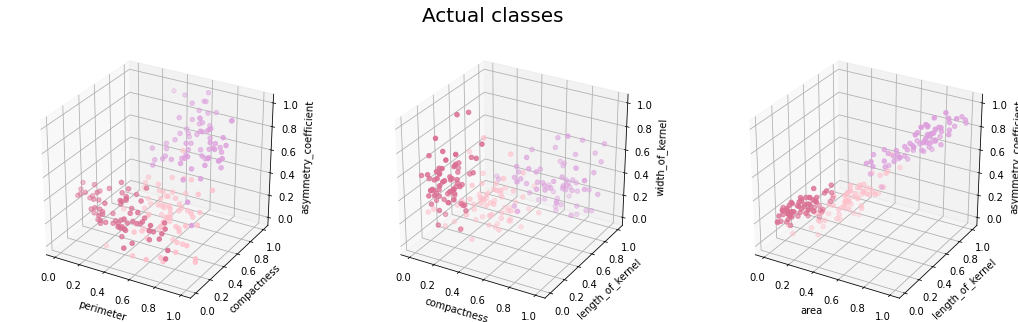

In [ ]:
scatter3d_special_compare(data_std, target.values.flatten(), labels, features_for_3d_scatter)

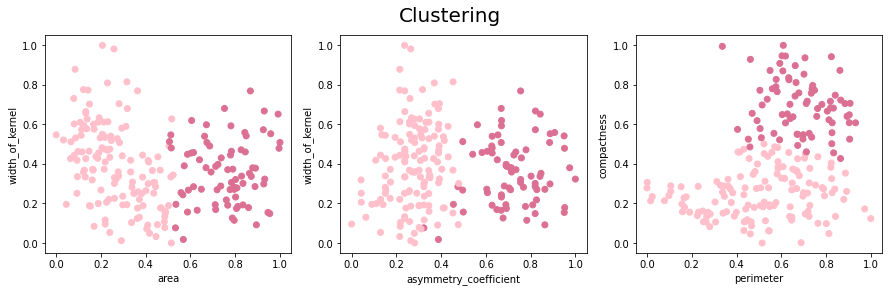

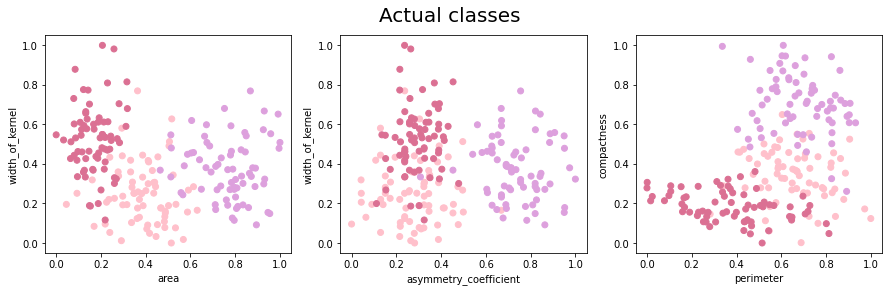

In [ ]:
scatter2d_special_compare(data_std, target.values.flatten(), labels, features_for_2d_scatter)

#### Метрики

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [ ]:
ss = silhouette_score(data_std, clustering.labels_)
print('silhouette score: ', ss)

dbs = calinski_harabasz_score(data_std, clustering.labels_)
print('calinski_harabasz_score: ', dbs)

cluster_separation = bss(data_std.values, clustering.labels_)
print('cluster_separation(bss): ', cluster_separation)

icd = intra_cluster_distance(data_std.values, clustering.labels_)
print('intra_cluster_distance: ', icd)

silhouette score:  0.4861987574864735
calinski_harabasz_score:  284.90183574577355
cluster_separation(bss):  0.9341079092309307
intra_cluster_distance:  0.35170072263412216


In [ ]:
from sklearn.cluster import OPTICS

In [ ]:
clustering = OPTICS(min_samples=50).fit(data_std)

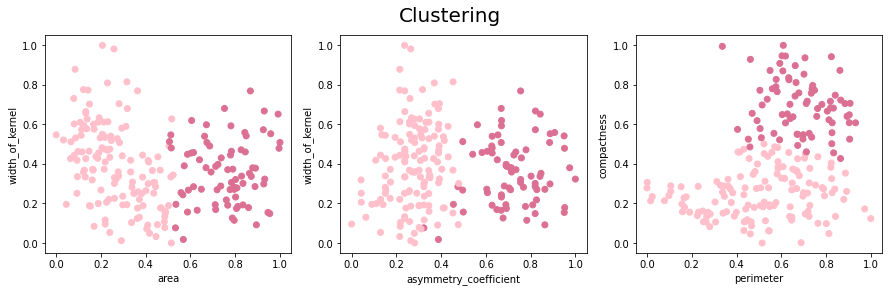

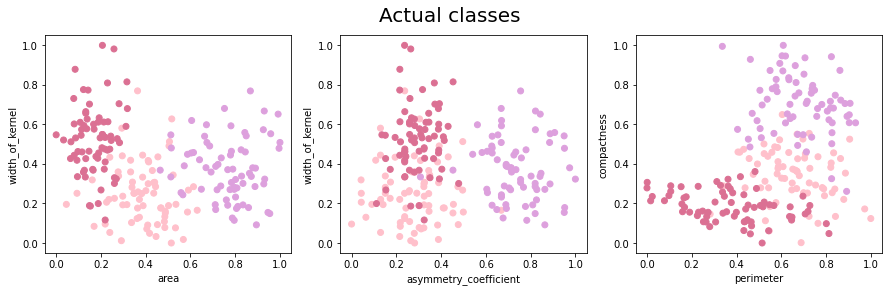

In [ ]:
scatter2d_special_compare(data_std, target.values.flatten(), labels, features_for_2d_scatter)

# DBSCAN

## Подбираем eps

In [ ]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

In [ ]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data_std)
distances, indices = nbrs.kneighbors(data_std)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

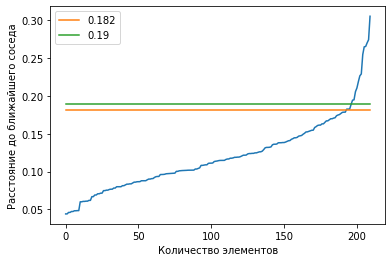

In [ ]:
plt.plot(distances)
plt.plot(range(210), [0.182]*210, label='0.182')
plt.plot(range(210), [0.19]*210, label='0.19')
plt.xlabel('Количество элементов')
plt.ylabel('Расстояние до ближайшего соседа')
plt.legend()

## Обучение

### eps = 0.182

In [ ]:
from sklearn.cluster import Birch
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import OPTICS
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.182, min_samples=12).fit(data_std)
unique, counts = np.unique(clustering.labels_, return_counts=True)
unique, counts

(array([-1,  0,  1,  2,  3]), array([131,  21,  21,  17,  20]))

In [ ]:
clustering.labels_

array([-1, -1,  0,  0, -1,  0,  0,  0, -1, -1, -1,  0, -1,  0,  0, -1, -1,
       -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0,
        0, -1, -1, -1,  0, -1,  0,  0, -1, -1, -1, -1, -1,  0,  0, -1,  0,
       -1, -1,  0, -1, -1,  0, -1,  0, -1, -1, -1, -1,  2, -1, -1, -1, -1,
       -1,  2, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1, -1, -1,  1, -1, -1,
       -1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1,  1, -1,  1,  1,
       -1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  2,  3, -1, -1,  2, -1, -1,  2, -1, -1,
        3,  3,  3, -1, -1, -1,  3, -1,  2,  2,  2, -1, -1,  2, -1,  3,  3,
       -1, -1,  3,  3, -1, -1,  3,  3,  3, -1,  3,  2,  2,  2, -1,  3, -1,
        3, -1, -1,  3,  3, -1,  3,  2, -1, -1, -1,  2, -1,  2, -1, -1, -1,
        2, -1,  3, -1,  3,  2])

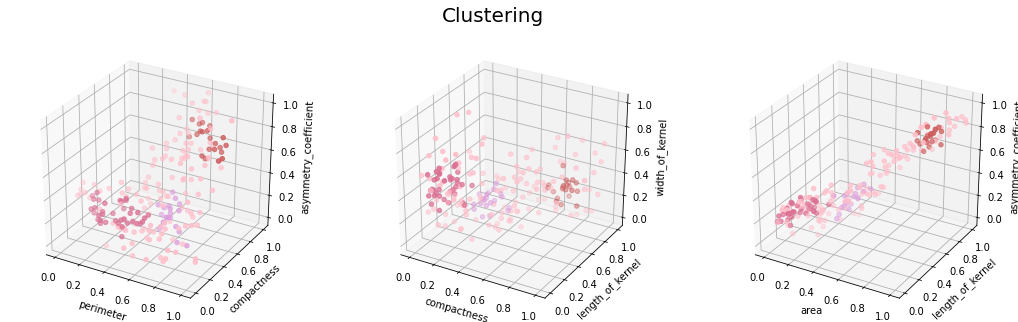

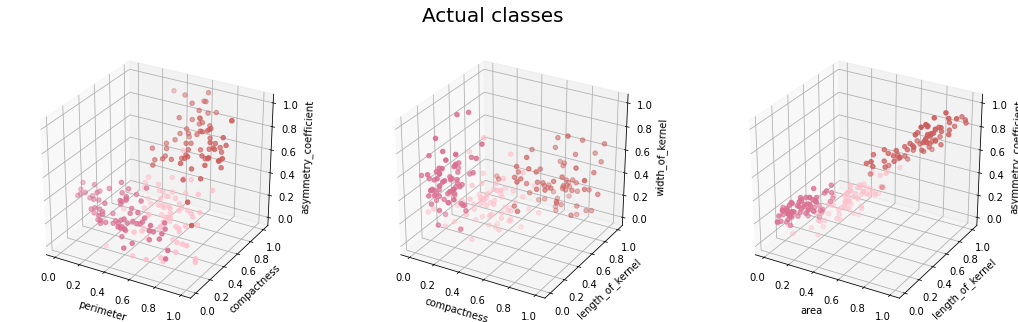

In [ ]:
scatter3d_special_compare(data_std, target.values.flatten(), clustering.labels_, features_for_3d_scatter)

#### Метрики

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [ ]:
ss = silhouette_score(data_std, clustering.labels_)
print('silhouette score: ', ss)

dbs = calinski_harabasz_score(data_std, clustering.labels_)
print('calinski_harabasz_score: ', dbs)

cluster_separation = bss(data_std.values, clustering.labels_)
print('cluster_separation(bss): ', cluster_separation)

icd = intra_cluster_distance(data_std.values, clustering.labels_)
print('intra_cluster_distance: ', icd)

silhouette score:  -0.12311615647669974
calinski_harabasz_score:  26.457592647631913
cluster_separation(bss):  0.6957920217274074
intra_cluster_distance:  0.5262141396539153


### eps = 0.19

In [ ]:
from sklearn.cluster import Birch
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import OPTICS
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.19, min_samples=12).fit(data_std)
unique, counts = np.unique(clustering.labels_, return_counts=True)
unique, counts

(array([-1,  0,  1,  2]), array([103,  31,  22,  54]))

In [ ]:
clustering.labels_

array([ 0,  0,  0,  0, -1,  0,  0,  0, -1, -1, -1,  0, -1,  0,  0, -1, -1,
       -1, -1,  2,  0,  0, -1, -1, -1, -1,  2, -1,  0,  0, -1,  0, -1,  0,
        0, -1, -1, -1,  0, -1,  0,  0, -1, -1, -1,  0, -1,  0,  0,  0,  0,
       -1, -1,  0, -1, -1,  0, -1,  0, -1, -1, -1, -1,  2, -1, -1,  0,  0,
        0,  2, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1, -1, -1,  1, -1, -1,
        1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1,  1, -1,  1,  1,
       -1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  2,  2,  2, -1,  2,  2,  2,  2, -1,  2,
        2,  2,  2,  2, -1, -1,  2, -1,  2,  2,  2,  2, -1,  2,  2,  2,  2,
       -1,  2,  2,  2,  2,  2,  2,  2,  2, -1,  2,  2,  2,  2, -1,  2,  2,
        2, -1, -1,  2,  2,  2,  2,  2, -1,  2,  2,  2, -1,  2, -1, -1, -1,
        2,  2,  2, -1,  2,  2])

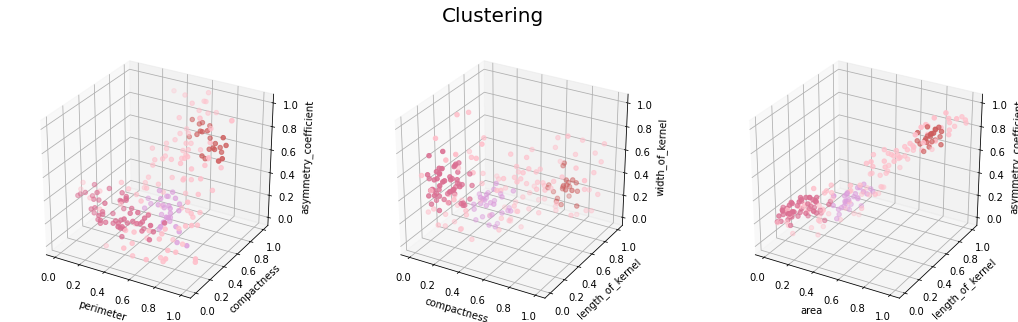

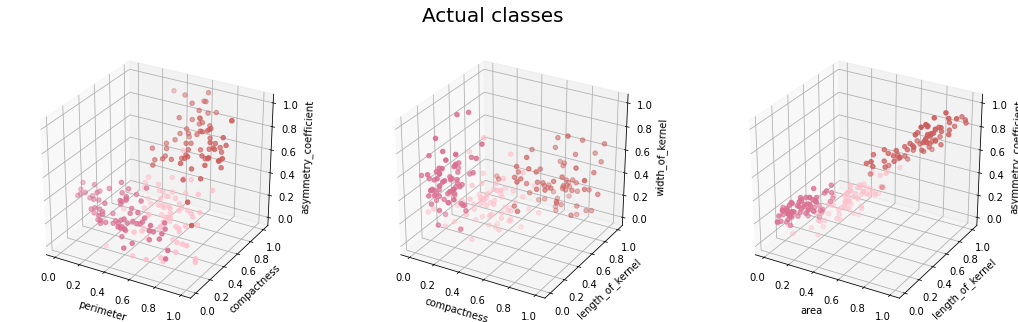

In [ ]:
scatter3d_special_compare(data_std, target.values.flatten(), clustering.labels_, features_for_3d_scatter)

#### Метрики

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [ ]:
ss = silhouette_score(data_std, clustering.labels_)
print('silhouette score: ', ss)

dbs = calinski_harabasz_score(data_std, clustering.labels_)
print('calinski_harabasz_score: ', dbs)

cluster_separation = bss(data_std.values, clustering.labels_)
print('cluster_separation(bss): ', cluster_separation)

icd = intra_cluster_distance(data_std.values, clustering.labels_)
print('intra_cluster_distance: ', icd)

silhouette score:  0.05626837107925232
calinski_harabasz_score:  52.533999417596895
cluster_separation(bss):  0.7087766936058002
intra_cluster_distance:  0.621291811452599
